In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from BaselineRemoval import BaselineRemoval
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import torch
from torch.utils.data import TensorDataset
import torch
from torch import nn
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch.utils.data import TensorDataset


## 1. ETL

In [124]:
from src import spectrumloader as spl

In [125]:
PLT = 'dataset/' ## change to the path to dataset
standard,data_all = spl.read_file(PLT)

In [126]:
Xs,ys,_ = spl.cut_tonumpy(data_all)

In [127]:
assert len(Xs) == 4, 'DATA error'

## 2.Train test split (with same seed)

In [128]:
X_trainall,_,y_trainall,_ = spl.split_train_test(Xs,ys)
y_train0,y_train1,y_train2,y_train3 = y_trainall

## 3. EDA [here](https://github.com/AtiChetsurakul/DataScienceAndMLProjects/blob/main/Diabete_detection_withRamanSpec/datawatcher.ipynb)
- To shorten the file, eda not inculded

In [129]:
#PCA
'''
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=10)
pca.fit(X_trainall)
X_trainall= pca.transform(X_trainall)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n\nfrom sklearn import decomposition\nfrom sklearn import datasets\n\nnp.random.seed(5)\n\niris = datasets.load_iris()\nX = iris.data\ny = iris.target\n\nfig = plt.figure(1, figsize=(4, 3))\nplt.clf()\n\nax = fig.add_subplot(111, projection="3d", elev=48, azim=134)\nax.set_position([0, 0, 0.95, 1])\n\n\nplt.cla()\npca = decomposition.PCA(n_components=10)\npca.fit(X_trainall)\nX_trainall= pca.transform(X_trainall)\n\nfor name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:\n    ax.text3D(\n        X[y == label, 0].mean(),\n        X[y == label, 1].mean() + 1.5,\n        X[y == label, 2].mean(),\n        name,\n        horizontalalignment="center",\n        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),\n    )\n# Reorder the labels to have colors matching the cluster results\ny = np.choose(y, [1, 2, 0]).astype(float)\nax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")\n\nax.w_

## 4. spectrum tranformation 
- incuding
    - Fluoresence removal
    - Correcting baseline
    - Normalization

In [130]:
X_train_VR = spl.fluoresence_removal(X_trainall)

In [131]:
X_train0_std,X_train1_std,X_train2_std,X_train3_std,normalizer = spl.seting_normalized_fuoresence_smoothing(True,True,X_train_VR)

assert len(normalizer) == 4, 'Normalizer is not here'

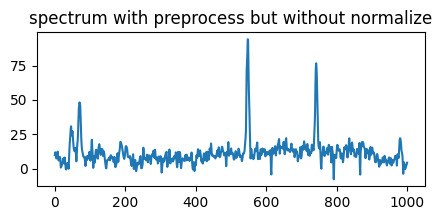

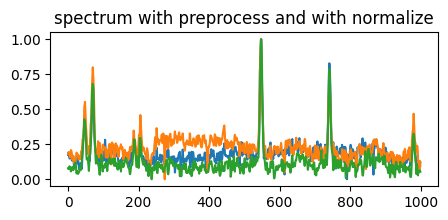

In [132]:
# Check by plot
plt.figure(figsize=(5,2))
plt.plot(X_train_VR[0][0])
plt.title('spectrum with preprocess but without normalize')
plt.show()
plt.figure(figsize=(5,2))
plt.title('spectrum with preprocess and with normalize')
plt.plot(X_train0_std[0])
plt.plot(X_train0_std[7])
plt.plot(X_train0_std[-1])

plt.show()

#Ear Lobe test

In [133]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train_ear, X_val_ear, y_train_ear, y_val_ear = train_test_split(X_train0_std, y_train0, test_size=0.2,random_state=109) # 70% training and 30% test
X_train_arm, X_val_arm, y_train_arm, y_val_arm = train_test_split(X_train1_std, y_train1, test_size=0.2,random_state=109) # 70% training and 30% test
X_train_nail,X_val_nail, y_train_nail, y_val_nail= train_test_split(X_train2_std, y_train2, test_size=0.2,random_state=109) # 70% training and 30% test
X_train_vein, X_val_vein, y_train_vein, y_val_vein = train_test_split(X_train3_std, y_train3, test_size=0.2,random_state=109) # 70% training and 30% test

In [134]:
'''
pca = decomposition.PCA(n_components=11)
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_test_pca=pca.transform(X_test)
'''

'\npca = decomposition.PCA(n_components=11)\npca.fit(X_train)\nX_train_pca= pca.transform(X_train)\nX_test_pca=pca.transform(X_test)\n'

In [135]:
#X_train_pca.shape


In [136]:
from sklearn import svm

#Create a svm  linear Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf1=svm.SVC(kernel='linear')
clf2=svm.SVC(kernel='linear')
clf3=svm.SVC(kernel='linear')
#Train the model using the training sets
model_ear=clf.fit(X_train_ear, y_train_ear)
model_arm=clf1.fit(X_train_arm, y_train_arm)
model_nail=clf2.fit(X_train_nail, y_train_nail)
model_vein=clf3.fit(X_train_vein, y_train_vein)
#Predict the response for test dataset
y_pred_ear = clf.predict(X_val_ear)
y_pred_arm= clf1.predict(X_val_arm)
y_pred_nail= clf2.predict(X_val_nail)
y_pred_vein= clf3.predict(X_val_vein)

In [137]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy ear:",metrics.accuracy_score(y_val_ear,y_pred_ear))
print("Accuracy arm:",metrics.accuracy_score(y_val_arm,y_pred_arm))
print("Accuracy nail:",metrics.accuracy_score(y_val_nail,y_pred_nail))
print("Accuracy vein:",metrics.accuracy_score(y_val_vein,y_pred_vein))

Accuracy ear: 0.5
Accuracy arm: 0.5
Accuracy nail: 1.0
Accuracy vein: 0.75


In [147]:
from sklearn.model_selection import cross_val_score

scoresclf = cross_val_score(clf, X_train_ear, y_train_ear, cv=5)
scoresclf

array([1.        , 0.66666667, 0.5       , 0.5       , 0.5       ])

In [ ]:
scoresclf1 = cross_val_score(clf1, X_train_arm, y_train_arm, cv=5)
scoresclf1

In [ ]:
scoresclf2= cross_val_score(clf2, X_train_nail, y_train_nail, cv=5)
scoresclf2

In [ ]:
scoresclf3=cross_val_score(clf2, X_train_vein, y_train_vein, cv=5)
scoresclf3

## 5. apply data to pytorch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [ ]:
ds_earloop = TensorDataset(torch.FloatTensor(X_train0_std),torch.LongTensor(y_train0))
ds_inarm = TensorDataset(torch.FloatTensor(X_train1_std),torch.LongTensor(y_train0))
ds_thumbnail = TensorDataset(torch.FloatTensor(X_train2_std),torch.LongTensor(y_train0))
ds_vain = TensorDataset(torch.FloatTensor(X_train3_std),torch.LongTensor(y_train0))

train_set0, val_set0 = torch.utils.data.random_split(ds_earloop, [10, 6])
train_set1, val_set1 = torch.utils.data.random_split(ds_inarm, [10, 6])
train_set2, val_set2 = torch.utils.data.random_split(ds_thumbnail, [10, 6])
train_set3, val_set3 = torch.utils.data.random_split(ds_vain, [10, 6])

In [ ]:
batch_size = 10
valbatch_size = 6


train_loader0 = torch.utils.data.DataLoader(dataset=train_set0,batch_size=batch_size,shuffle=True)
val_loader0 = torch.utils.data.DataLoader(dataset=val_set0, batch_size=valbatch_size, shuffle=True)

train_loader1 = torch.utils.data.DataLoader(dataset=train_set1,batch_size=batch_size,shuffle=True)
val_loader1 = torch.utils.data.DataLoader(dataset=val_set1, batch_size=valbatch_size, shuffle=True)

train_loader2 = torch.utils.data.DataLoader(dataset=train_set2,batch_size=batch_size,shuffle=True)
val_loader2 = torch.utils.data.DataLoader(dataset=val_set2, batch_size=valbatch_size, shuffle=True)

train_loader3 = torch.utils.data.DataLoader(dataset=train_set3,batch_size=batch_size,shuffle=True)
val_loader3 = torch.utils.data.DataLoader(dataset=val_set3, batch_size=valbatch_size, shuffle=True)



## 6. modeling